In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv('train.csv')

In [3]:
columns_to_drop = ['PassengerId','Name','Ticket','Cabin','Embarked']

In [4]:
data_clean = data.drop(columns_to_drop,axis=1)

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_clean['Sex'] = le.fit_transform(data_clean['Sex'])

In [6]:
# Filling missing age values by mean
data_clean = data_clean.fillna(data_clean["Age"].mean())

In [7]:
input_cols = ['Pclass','Sex','Age','SibSp','Parch','Fare']
output_cols = ['Survived']

X = data_clean[input_cols]
Y = data_clean[output_cols]

print(X.shape,Y.shape)
print(type(X))

(891, 6) (891, 1)
<class 'pandas.core.frame.DataFrame'>


In [8]:
split = int(0.7*data_clean.shape[0])

train_data = data_clean[:split]
test_data = data_clean[split:]

test_data = test_data.reset_index(drop=True)

print(train_data.shape,test_data.shape)

(623, 7) (268, 7)


In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
sk_tree = DecisionTreeClassifier(criterion='entropy',max_depth=5)

In [11]:
sk_tree.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [12]:
sk_tree.predict(test_data[input_cols])

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0], dtype=int64)

In [13]:
sk_tree.score(test_data[input_cols],test_data[output_cols])

0.8283582089552238

In [14]:
sk_tree_gini = DecisionTreeClassifier(criterion='gini',max_depth=5)

In [15]:
sk_tree_gini.fit(train_data[input_cols],train_data[output_cols])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
sk_tree_gini.score(test_data[input_cols],test_data[output_cols])

0.8171641791044776

## Visualizing Decision Tree

In [17]:
!pip install pydotplus

In [18]:
import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

c:\python\python38\lib\site-packages\sklearn\externals\six.py:28: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  warnings.warn("The module is deprecated in version 0.21 and will be removed "


In [20]:
dot_data = StringIO()
export_graphviz(sk_tree_gini,out_file=dot_data,filled=True,rounded=True)

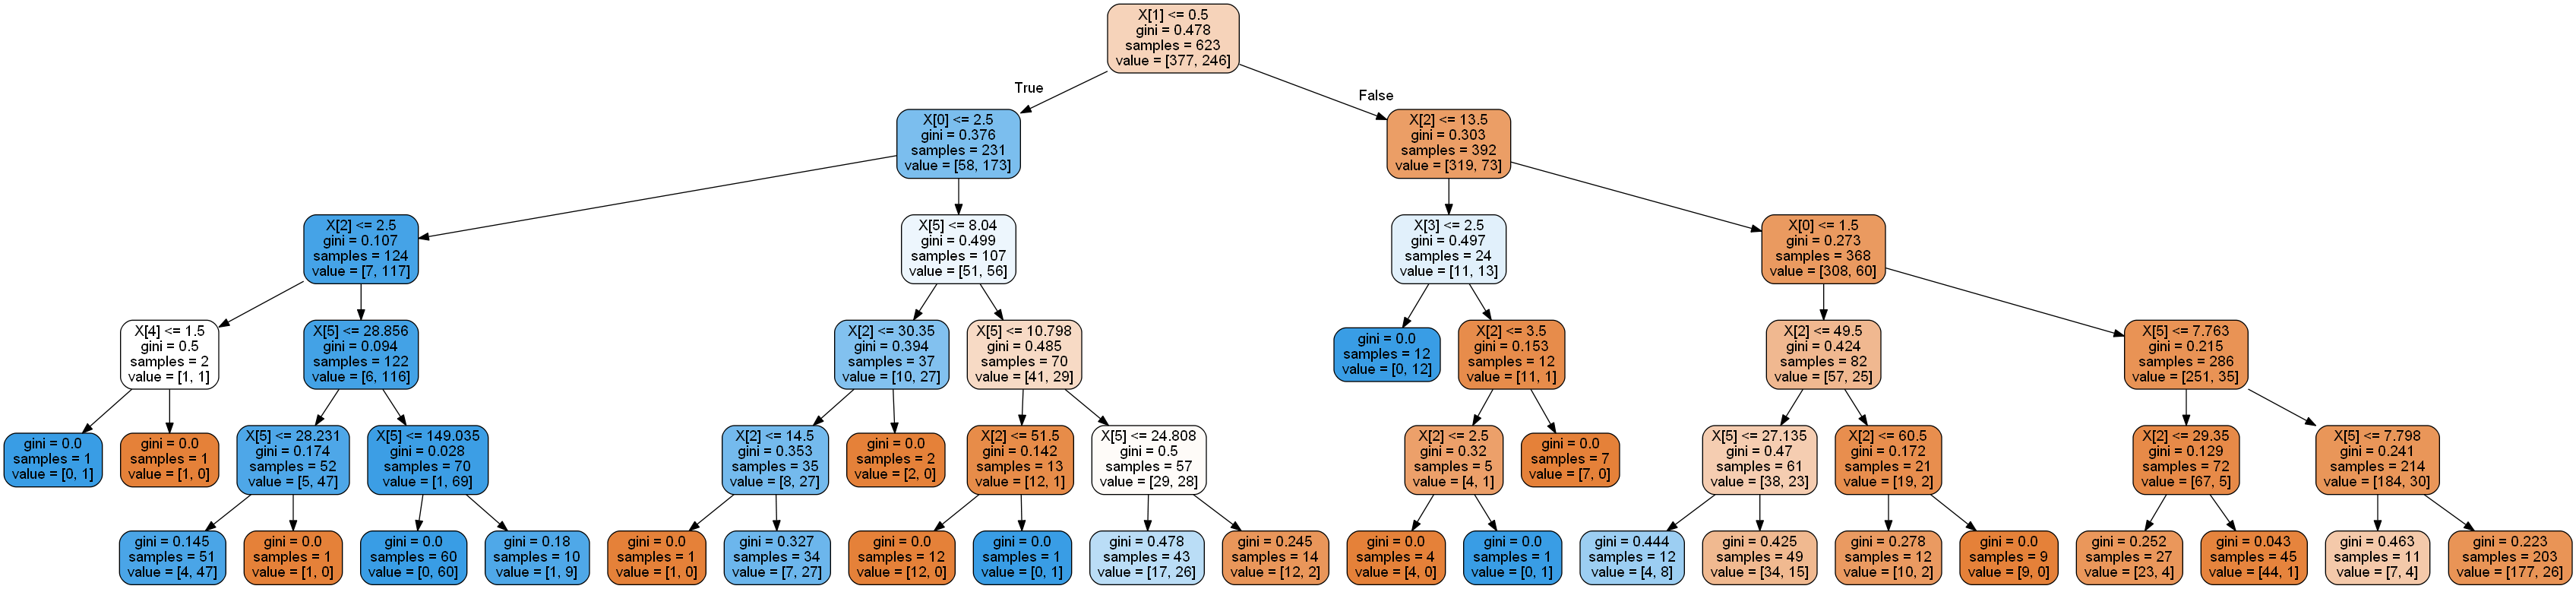

In [21]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Random Forest

In [34]:
X_train = train_data[input_cols]
Y_train = np.array(train_data[output_cols]).reshape((-1,))
X_test = test_data[input_cols]
Y_test = np.array(test_data[output_cols]).reshape((-1,1))

In [35]:
sk_tree = DecisionTreeClassifier(criterion='entropy')
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.9823434991974318

In [36]:
sk_tree.score(X_test,Y_test)

0.7761194029850746

In [37]:
## Specify max depth = 5
sk_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5)
sk_tree.fit(X_train,Y_train)
sk_tree.score(X_train,Y_train)

0.8443017656500803

In [38]:
sk_tree.score(X_test,Y_test)

0.8283582089552238

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
rf = RandomForestClassifier(n_estimators=10,criterion='entropy')

In [41]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [42]:
rf.score(X_train,Y_train)

0.9695024077046549

In [43]:
rf.score(X_test,Y_test)

0.8097014925373134

In [44]:
## Specify max depth = 5
rf = RandomForestClassifier(n_estimators=10,criterion='entropy',max_depth=5)
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)

0.8635634028892456

In [45]:
rf.score(X_test,Y_test)

0.8283582089552238

In [46]:
from sklearn.model_selection import cross_val_score

In [49]:
acc = cross_val_score(rf,X_train,Y_train,cv=5).mean()

In [50]:
print(acc)

0.8057935483870967


In [51]:
acc_list = []

for i in range(1,50):
    acc = cross_val_score(RandomForestClassifier(n_estimators=i,criterion='entropy',max_depth=5),X_train,Y_train,cv=5).mean()
    acc_list.append(acc)

In [52]:
import matplotlib.pyplot as plt

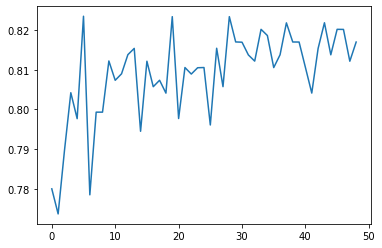

In [53]:
plt.plot(acc_list)
plt.show()

In [54]:
np.argmax(acc_list)

5

In [55]:
rf = RandomForestClassifier(n_estimators=6,criterion='entropy',max_depth=5)

In [56]:
rf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=6,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [57]:
rf.score(X_train,Y_train)

0.8426966292134831

In [58]:
rf.score(X_test,Y_test)

0.8283582089552238